In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df =pd.read_csv('202104-divvy-tripdata.csv')

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337230 entries, 0 to 337229
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             337230 non-null  object 
 1   rideable_type       337230 non-null  object 
 2   started_at          337230 non-null  object 
 3   ended_at            337230 non-null  object 
 4   start_station_name  311174 non-null  object 
 5   start_station_id    311174 non-null  object 
 6   end_station_name    309056 non-null  object 
 7   end_station_id      309056 non-null  object 
 8   start_lat           337230 non-null  float64
 9   start_lng           337230 non-null  float64
 10  end_lat             336963 non-null  float64
 11  end_lng             336963 non-null  float64
 12  member_casual       337230 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.4+ MB


In [ ]:
df.shape

(337230, 13)

In [ ]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,337230.000000,337230.000000,336963.000000,336963.000000
mean,41.901488,-87.644836,41.901880,-87.645122
std,0.045897,0.026785,0.046004,0.026860
min,41.640000,-87.780000,41.590000,-87.850000
25%,41.881187,-87.659172,41.881320,-87.659660
50%,41.898587,-87.641170,41.898969,-87.641753
75%,41.928887,-87.627415,41.929442,-87.627691
max,42.070000,-87.520000,42.150000,-87.520000


In [ ]:
df.isnull()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337225,False,False,False,False,False,False,False,False,False,False,False,False,False
337226,False,False,False,False,False,False,False,False,False,False,False,False,False
337227,False,False,False,False,False,False,False,False,False,False,False,False,False
337228,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,26056
start_station_id,26056
end_station_name,28174
end_station_id,28174
start_lat,0
start_lng,0


In [ ]:
df.ride_id.unique()

array(['6C992BD37A98A63F', '1E0145613A209000', 'E498E15508A80BAD', ...,
       '4308ADB9171ACE49', '04DFB53077A17DA2', 'DB6F78ABBECA378C'],
      dtype=object)

In [ ]:
df.ride_id.nunique()

337230

In [ ]:
df.start_station_id.unique()

array(['TA1307000061', 'KA1503000069', '20121', 'TA1305000034', '15542',
       '16948', '15597', '13133', 'SL-005', '13253', '637',
       'TA1307000139', '13235', 'TA1306000026', 'KA1503000053', '15645',
       '13109', '15578', 'TA1306000025', '527', '560', 'KA1504000146',
       '15687', 'TA1309000007', 'TA1306000013', 'KA1503000031', '20244',
       'KA1503000059', 'TA1309000001', '636', '13165', '576', '15691',
       '13008', 'TA1308000043', '662', '20203', 'SL-011', 'TA1309000011',
       '13304', '13389', '15644', 'TA1308000050', '13323', '13216',
       'TA1309000012', 'TA1305000005', 'TA1307000005', '13303', '13256',
       'RN-', '13193', '13080', 'TA1307000149', 'TA1307000131',
       'TA1305000037', 'KA1504000134', 'TA1309000061', 'LP-',
       'KA1504000161', 'TA1309000018', '15623', 'KA1504000097', '13029',
       'KA1503000068', '623', 'KA1503000044', 'KA1504000109',
       'KA1503000054', 'SL-007', 'KA1504000090', 'TA1308000038', '15545',
       '15655', '13191', 'TA1

In [ ]:
df.start_station_id.nunique()

681

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(337230, 13)

In [ ]:
df['start_station_name']

,start_station_name
0,State St & Pearson St
1,Dorchester Ave & 49th St
2,Loomis Blvd & 84th St
3,Honore St & Division St
4,Loomis Blvd & 84th St
...,...
337225,Mies van der Rohe Way & Chestnut St
337226,Mies van der Rohe Way & Chestnut St
337227,Mies van der Rohe Way & Chestnut St
337228,Mies van der Rohe Way & Chestnut St


In [ ]:
df['start_station_name'].unique()

array(['State St & Pearson St', 'Dorchester Ave & 49th St',
       'Loomis Blvd & 84th St', 'Honore St & Division St',
       'Clinton St & Polk St', 'Ashland Ave & 63rd St',
       'Halsted St & 69th St', 'Damen Ave & Cortland St',
       'Indiana Ave & Roosevelt Rd', 'Lincoln Ave & Waveland Ave',
       'Wood St & Chicago Ave', 'MLK Jr Dr & 29th St',
       'Southport Ave & Waveland Ave', 'Racine Ave & Fullerton Ave',
       'MLK Jr Dr & 63rd St', 'Richmond St & Diversey Ave',
       'Broadway & Berwyn Ave', 'Broadway & Ridge Ave',
       'Racine Ave & Congress Pkwy', 'Western Ave & Howard St',
       'Marshfield Ave & 59th St', 'Clark St & Berwyn Ave',
       'Central Park Ave & 24th St', 'Franklin St & Monroe St',
       'New St & Illinois St', 'Cottage Grove Ave & 67th St',
       'Halsted St & 73rd St', 'Lake Park Ave & 53rd St',
       'Halsted St & Maxwell St', 'Orleans St & Hubbard St',
       'Racine Ave & 13th St', 'Greenwood Ave & 79th St',
       'Albany Ave & 26th St', 'M

In [ ]:
df['start_station_name'].nunique()

681

In [ ]:
df['start_station_name'].unique()[0]

'State St & Pearson St'

In [ ]:
type(df['start_station_name'].unique()[0])

str

In [ ]:
df[df['start_station_name']=="State St & Pearson St"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
45,1DFCB9DF65688E01,classic_bike,2021-04-26 18:25:44,2021-04-26 19:06:54,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,casual
47,254204CC5A9514F4,classic_bike,2021-04-07 18:21:03,2021-04-07 18:50:23,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
138,C5954011801F0F15,classic_bike,2021-04-03 12:12:34,2021-04-03 12:38:24,State St & Pearson St,TA1307000061,Burnham Harbor,15545,41.897448,-87.628722,41.856268,-87.613348,member
153,37A443C5CB91028A,electric_bike,2021-04-18 20:12:49,2021-04-18 20:25:09,State St & Pearson St,TA1307000061,Lincoln Park Conservatory,LP-,41.897651,-87.628861,41.924168,-87.635925,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286781,3823C7A4235DB65F,classic_bike,2021-04-30 15:13:39,2021-04-30 15:30:57,State St & Pearson St,TA1307000061,Bissell St & Armitage Ave,13059,41.897448,-87.628722,41.918440,-87.652220,member
286782,7DA654E272642E8E,electric_bike,2021-04-03 02:21:08,2021-04-03 02:54:22,State St & Pearson St,TA1307000061,Bissell St & Armitage Ave,13059,41.897648,-87.628751,41.918243,-87.652325,casual
286792,566B5C8CD18BA1E0,classic_bike,2021-04-08 18:12:55,2021-04-08 18:43:48,State St & Pearson St,TA1307000061,Sheffield Ave & Webster Ave,TA1309000033,41.897448,-87.628722,41.921540,-87.653818,member
288552,DD95EEEA282B6F56,classic_bike,2021-04-27 15:55:47,2021-04-27 16:19:27,State St & Pearson St,TA1307000061,Bissell St & Armitage Ave,13059,41.897448,-87.628722,41.918440,-87.652220,member


In [ ]:
df.drop(columns=['start_lng'], inplace=True)

In [ ]:
df.drop(columns=['start_lat'], inplace=True)

In [ ]:
df.drop(columns=['end_lng'], inplace=True)

In [ ]:
df.drop(columns=['end_lat'], inplace=True)

In [ ]:
df.shape

(337230, 9)

In [ ]:
df[['ride_id','start_station_id','end_station_id']].head()

,ride_id,start_station_id,end_station_id
0,6C992BD37A98A63F,TA1307000061,13235
1,1E0145613A209000,KA1503000069,KA1503000069
2,E498E15508A80BAD,20121,20121
3,1887262AD101C604,TA1305000034,13235
4,C123548CAB2A32A5,20121,20121


In [ ]:
df[['ride_id','start_station_id','end_station_id']].describe()

,ride_id,start_station_id,end_station_id
count,337230,311174,309056
unique,337230,681,681
top,DB6F78ABBECA378C,13300,13300
freq,1,3705,3500


In [ ]:
df[['ride_id','start_station_id','end_station_id']].describe().loc[['count','unique']]

,ride_id,start_station_id,end_station_id
count,337230,311174,309056
unique,337230,681,681


In [ ]:
df['date']

,date
0,2021-04-12
1,2021-04-27
2,2021-04-03
3,2021-04-17
4,2021-04-03
...,...
337225,2021-04-09
337226,2021-04-04
337227,2021-04-30
337228,2021-04-18


In [ ]:
df.date.unique()

array([datetime.date(2021, 4, 12), datetime.date(2021, 4, 27),
       datetime.date(2021, 4, 3), datetime.date(2021, 4, 17),
       datetime.date(2021, 4, 25), datetime.date(2021, 4, 6),
       datetime.date(2021, 4, 24), datetime.date(2021, 4, 4),
       datetime.date(2021, 4, 13), datetime.date(2021, 4, 8),
       datetime.date(2021, 4, 7), datetime.date(2021, 4, 26),
       datetime.date(2021, 4, 16), datetime.date(2021, 4, 11),
       datetime.date(2021, 4, 21), datetime.date(2021, 4, 10),
       datetime.date(2021, 4, 23), datetime.date(2021, 4, 5),
       datetime.date(2021, 4, 30), datetime.date(2021, 4, 20),
       datetime.date(2021, 4, 22), datetime.date(2021, 4, 15),
       datetime.date(2021, 4, 18), datetime.date(2021, 4, 29),
       datetime.date(2021, 4, 2), datetime.date(2021, 4, 19),
       datetime.date(2021, 4, 28), datetime.date(2021, 4, 14),
       datetime.date(2021, 4, 9), datetime.date(2021, 4, 1)], dtype=object)

In [ ]:
df.date.nunique()

30

In [ ]:
vcount = df['date'].value_counts()
vcount

,count
date,
2021-04-03,19646
2021-04-27,18266
2021-04-06,17313
2021-04-04,17180
2021-04-07,15605
2021-04-24,15106
2021-04-26,14430
2021-04-17,14101
2021-04-23,13462


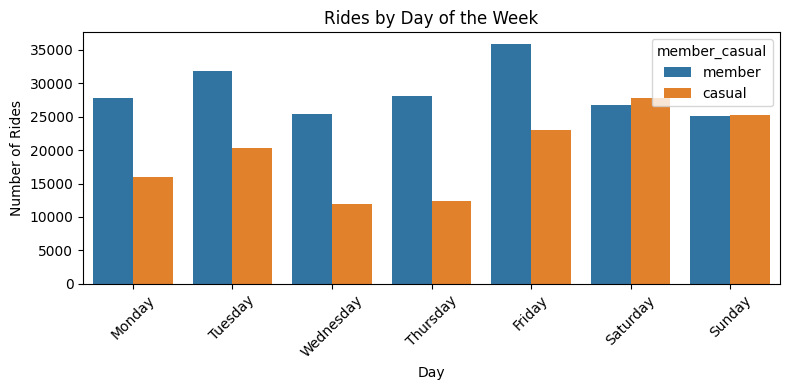

In [ ]:
# Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Extract time-related features
df['day_of_week'] = df['started_at'].dt.day_name()
df['hour'] = df['started_at'].dt.hour
df['date'] = df['started_at'].dt.date

# Plot: Rides by Day of the Week
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='member_casual')
plt.title("Rides by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



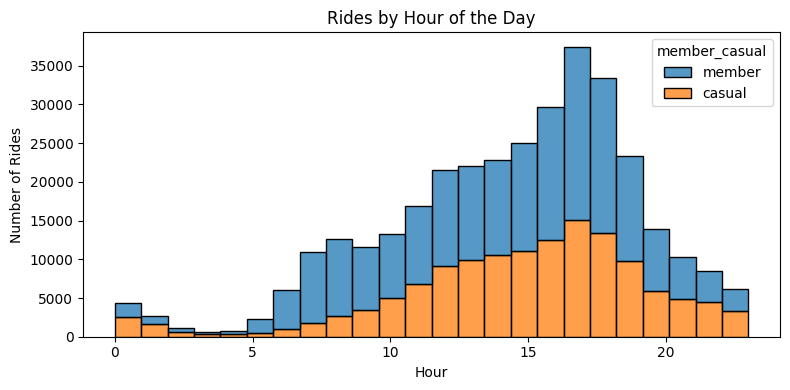

In [ ]:
# Plot: Rides by Hour of the Day
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='hour', hue='member_casual', bins=24, multiple='stack')
plt.title("Rides by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()

<ipython-input-37-de0b3b6fea94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_start.values, y=top_start.index, palette='viridis')


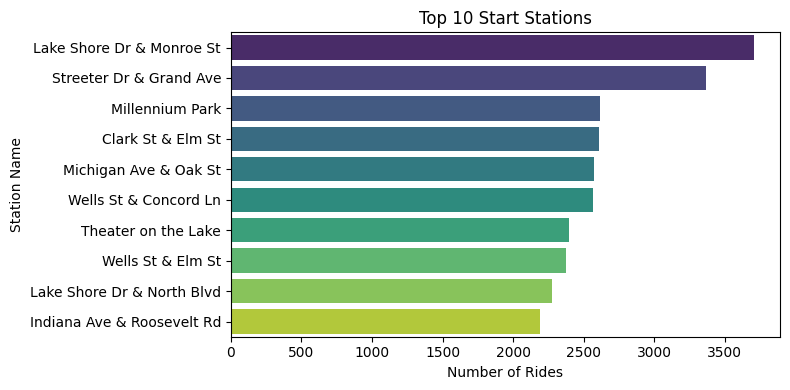

In [ ]:
# 3. Top 10 start stations
top_start = df['start_station_name'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_start.values, y=top_start.index, palette='viridis')
plt.title("Top 10 Start Stations")
plt.xlabel("Number of Rides")
plt.ylabel("Station Name")
plt.tight_layout()
plt.show()


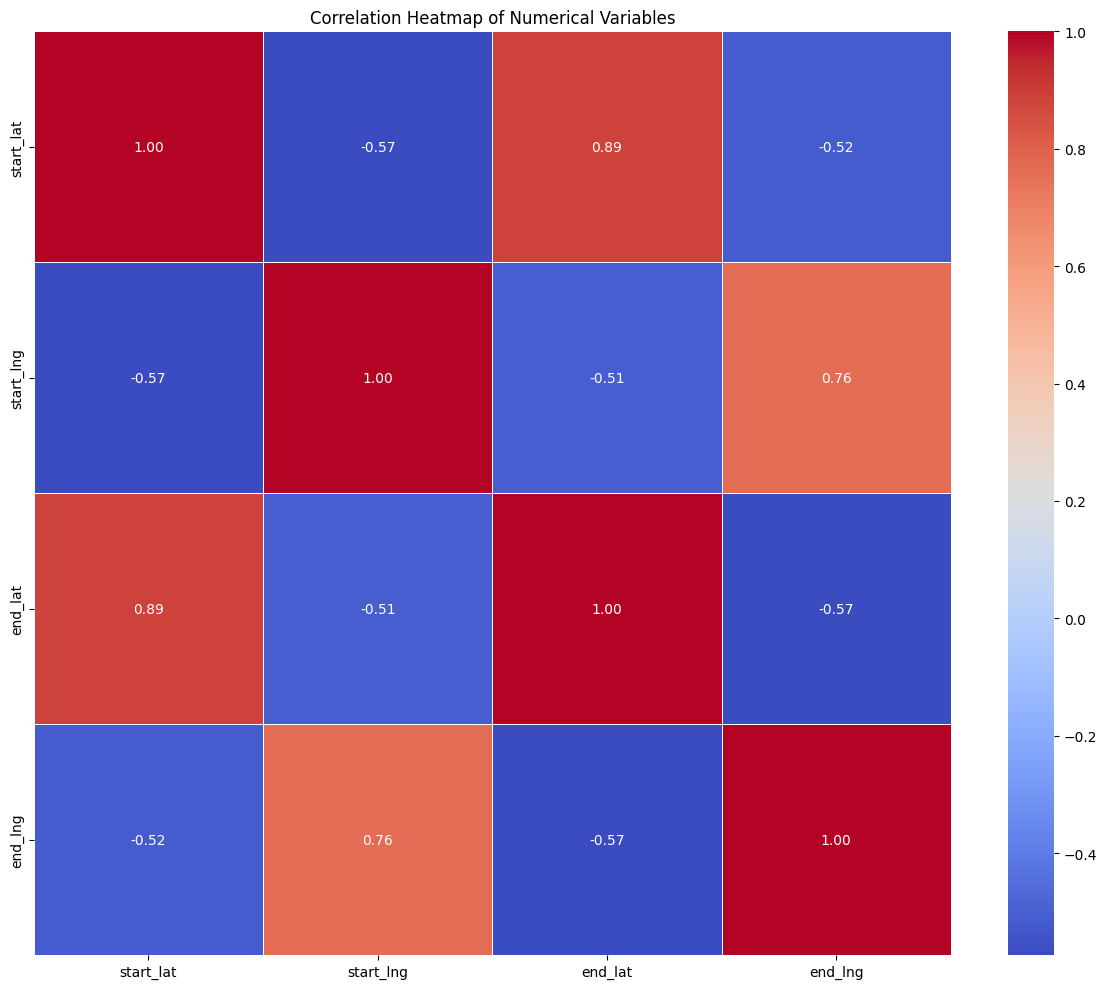

In [ ]:
# Create correlation matrix of numerical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

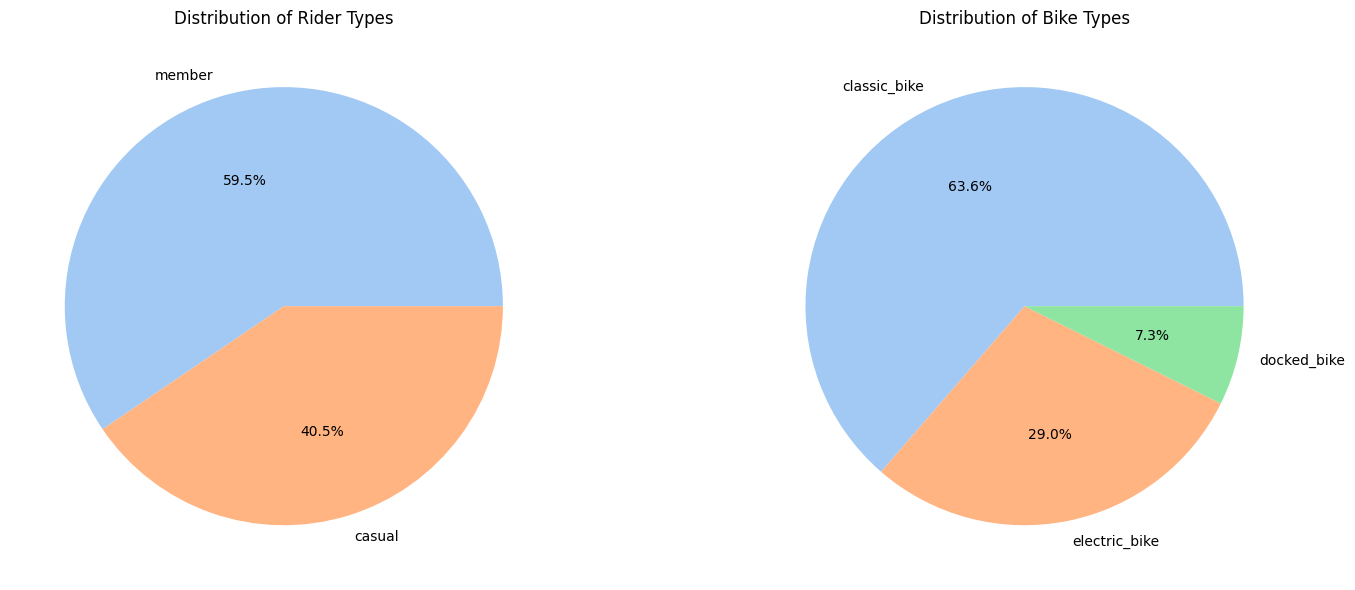

In [ ]:
# Pie chart of rider types
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
df['member_casual'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Rider Types')
plt.ylabel('')

plt.subplot(1, 2, 2)
df['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Bike Types')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Create a map of station popularity
import folium
from folium.plugins import HeatMap

# Create a dataframe of station coordinates and popularity
station_counts = df['start_station_name'].value_counts().reset_index()
station_counts.columns = ['station_name', 'count']

# Merge with location data
station_locations = df.groupby('start_station_name')[['start_lat', 'start_lng']].mean().reset_index()
station_popularity = station_counts.merge(station_locations, left_on='station_name', right_on='start_station_name')

# Create a map centered on Chicago
chicago_map = folium.Map(location=[41.88, -87.62], zoom_start=12)

# Add heat map layer
heat_data = [[row['start_lat'], row['start_lng'], row['count']] for index, row in station_popularity.iterrows()]
HeatMap(heat_data, radius=15).add_to(chicago_map)

# Display the map (in Jupyter) - save to html file to view
chicago_map.save('station_popularity_map.html')
print("Map saved to 'station_popularity_map.html'. Open this file in a browser to view the map.")

Map saved to 'station_popularity_map.html'. Open this file in a browser to view the map.


In [ ]:
print(df.columns)


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


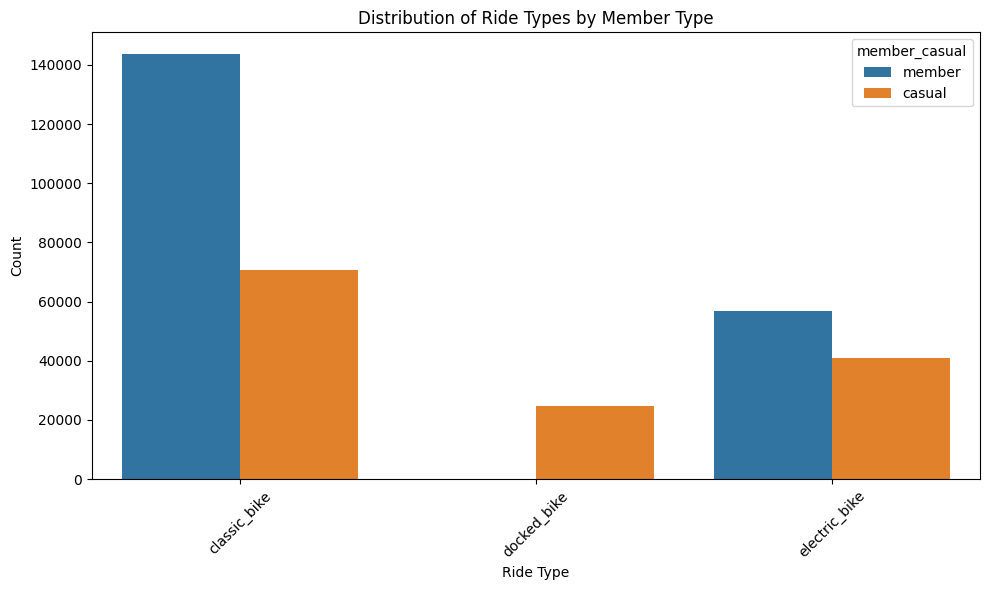

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Extract date components
df['start_date'] = df['started_at'].dt.date
df['start_hour'] = df['started_at'].dt.hour
df['day_of_week'] = df['started_at'].dt.day_name()

# Define day order for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 1. Ride Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rideable_type', hue='member_casual', data=df)
plt.title('Distribution of Ride Types by Member Type')
plt.xlabel('Ride Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ride_type_distribution.png')
plt.show()

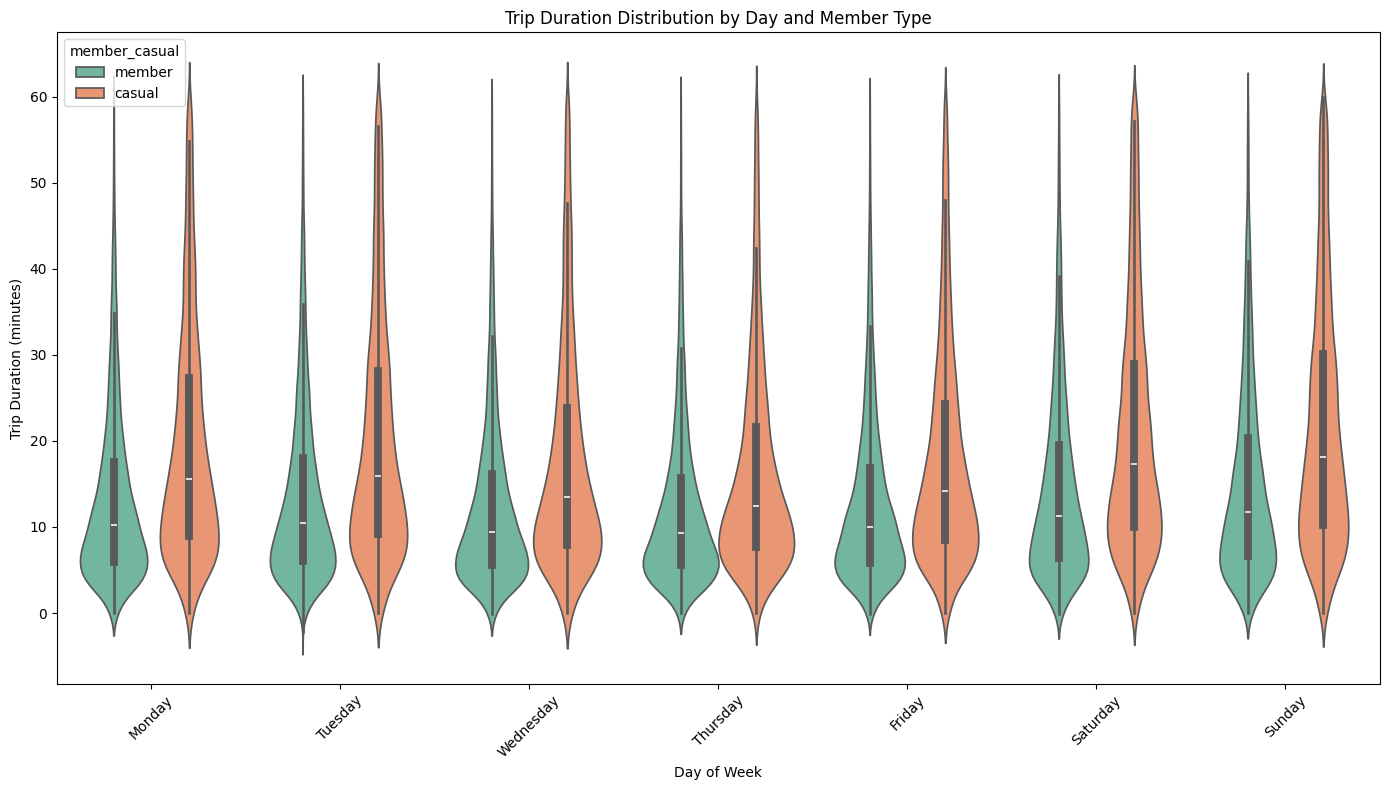

In [ ]:
# 2. Trip Duration Violin Plot
# Filter to reasonable durations for visualization
df_filtered = df[df['trip_duration_min'] < 60]  # Trips under 60 minutes
plt.figure(figsize=(14, 8))
sns.violinplot(x='day_of_week', y='trip_duration_min', hue='member_casual',
               data=df_filtered, order=day_order, palette='Set2')
plt.title('Trip Duration Distribution by Day and Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('trip_duration_by_day.png')
plt.show()


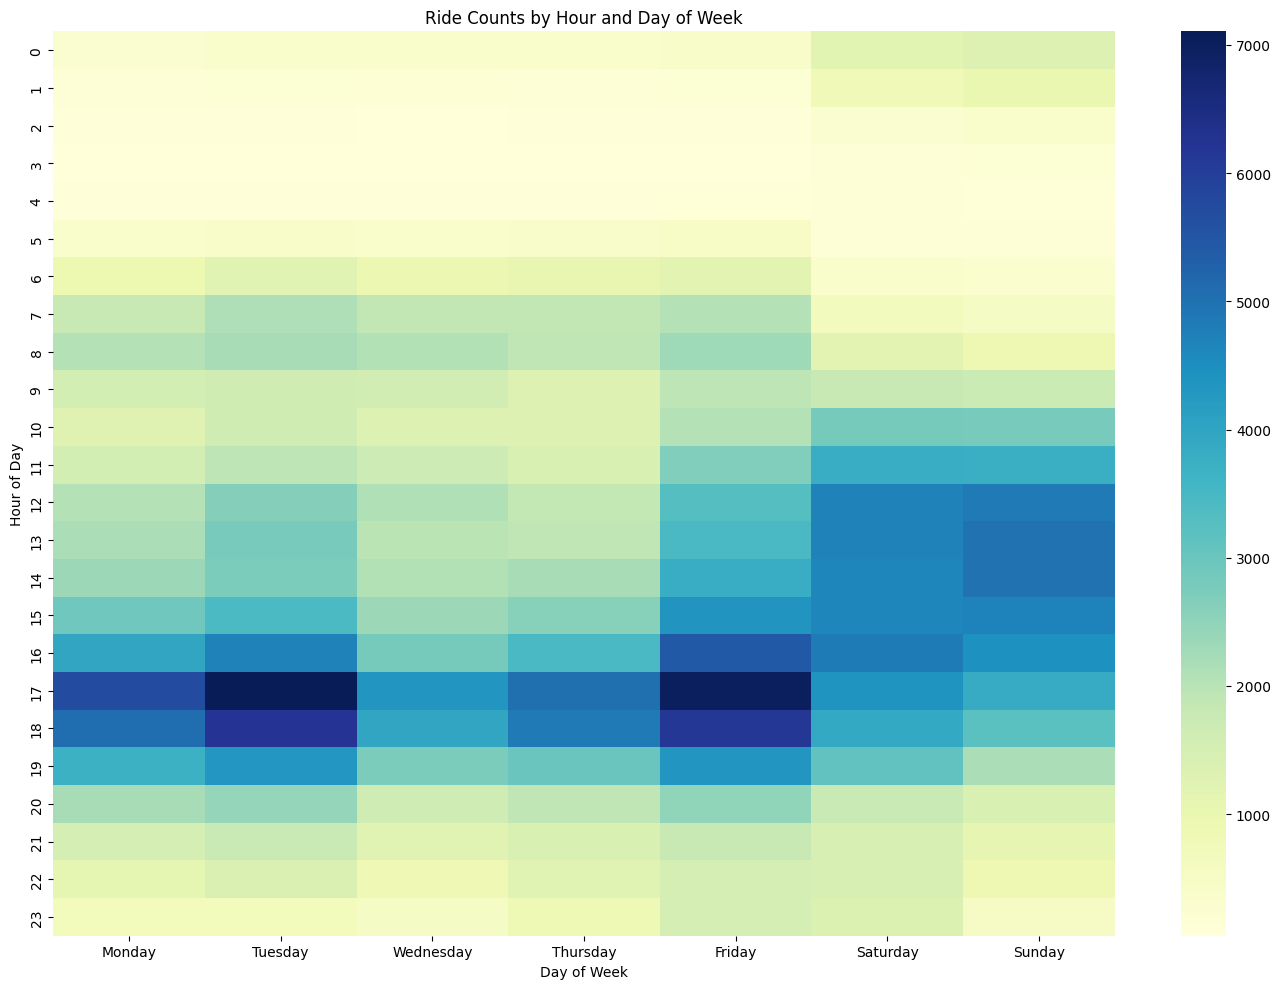

In [ ]:
hourly_data = df.groupby(['day_of_week', 'start_hour']).size().reset_index(name='count')
hourly_pivot = hourly_data.pivot(index='start_hour', columns='day_of_week', values='count')
hourly_pivot = hourly_pivot.reindex(columns=day_order)  # Reorder days

plt.figure(figsize=(14, 10))
sns.heatmap(hourly_pivot, cmap='YlGnBu', annot=False)
plt.title('Ride Counts by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.savefig('hourly_heatmap.png')
plt.show()

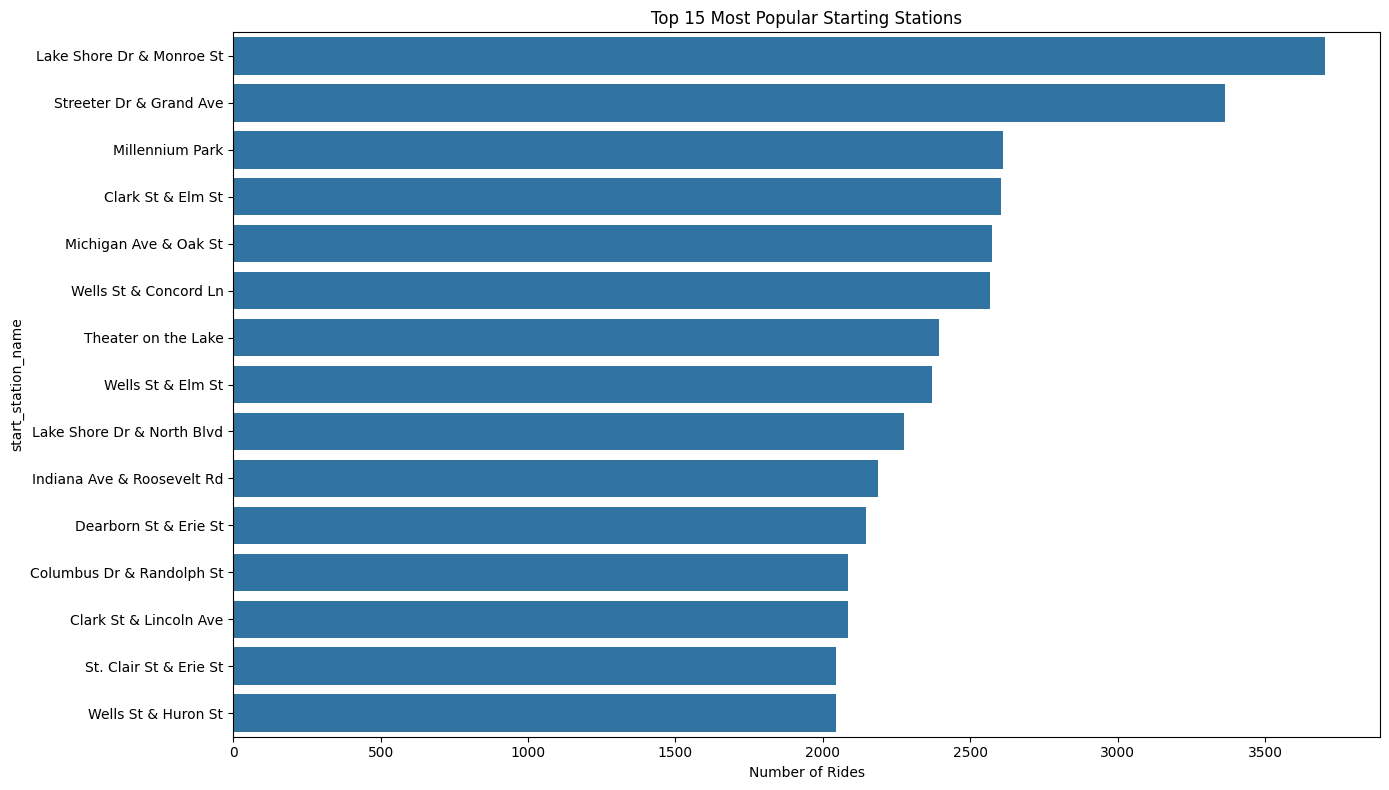

In [ ]:
top_stations = df['start_station_name'].value_counts().head(15)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_stations.values, y=top_stations.index)
plt.title('Top 15 Most Popular Starting Stations')
plt.xlabel('Number of Rides')
plt.tight_layout()
plt.savefig('top_stations.png')
plt.show()

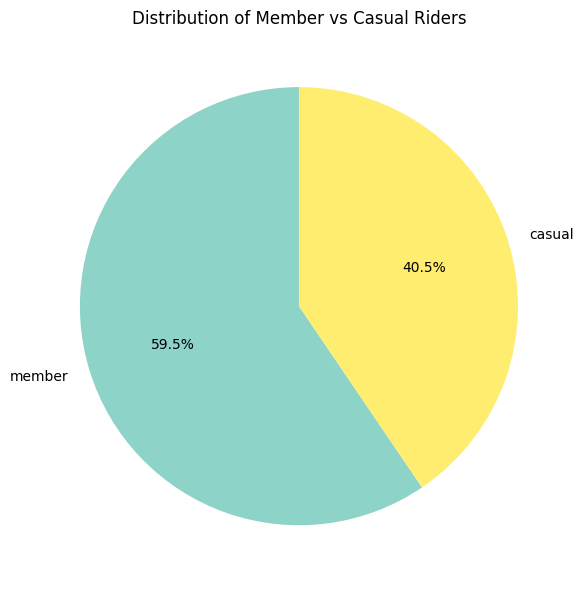

In [ ]:
plt.figure(figsize=(10, 6))
df['member_casual'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Member vs Casual Riders')
plt.ylabel('')  # Hide the ylabel
plt.tight_layout()
plt.savefig('member_casual_pie.png')
plt.show()

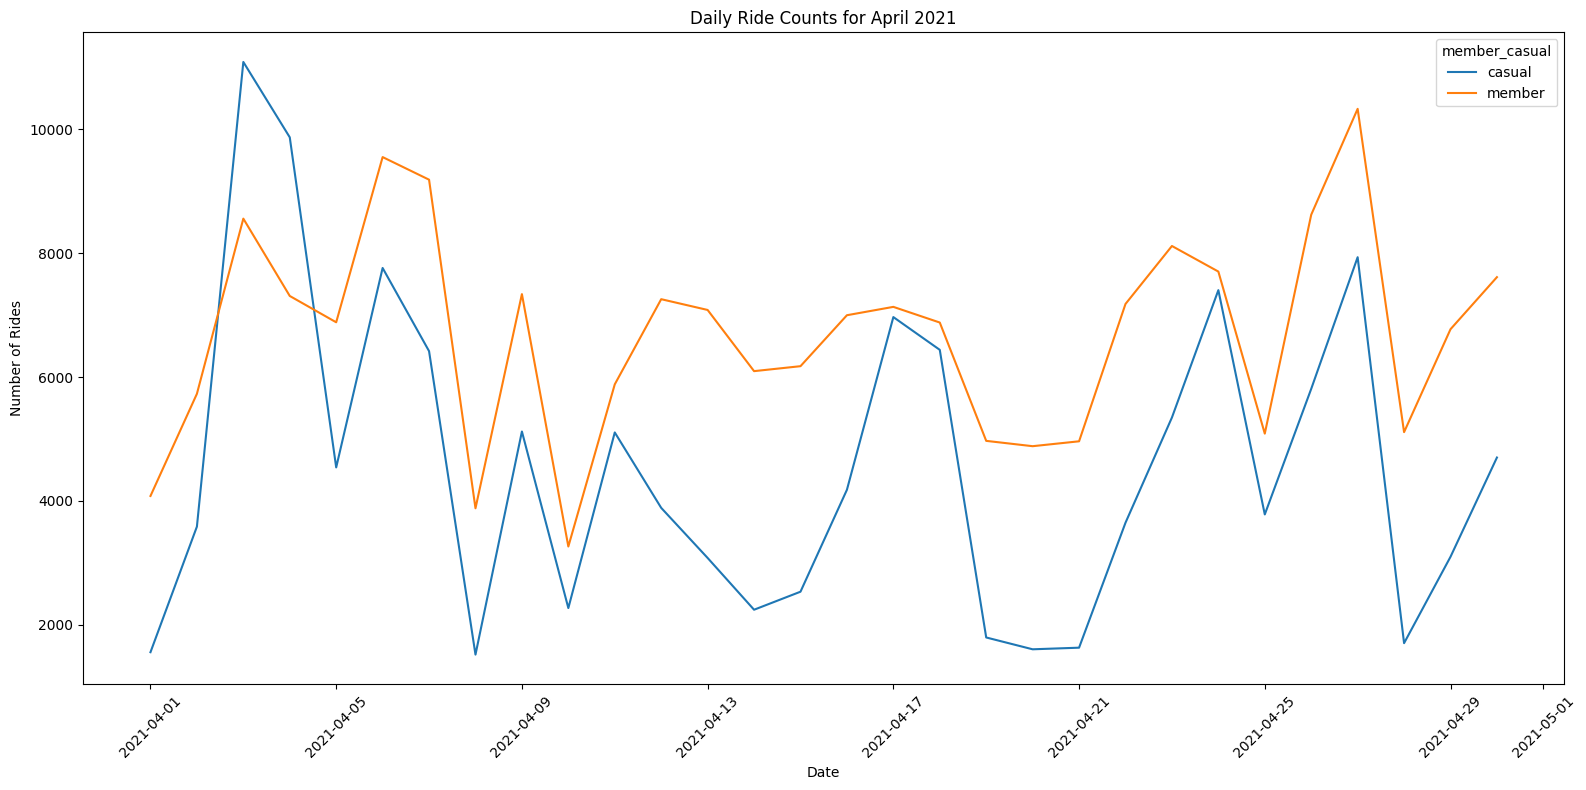

In [ ]:
daily_rides = df.groupby(['start_date', 'member_casual']).size().reset_index(name='count')
plt.figure(figsize=(16, 8))
sns.lineplot(x='start_date', y='count', hue='member_casual', data=daily_rides)
plt.title('Daily Ride Counts for April 2021')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_ride_trends.png')
plt.show()

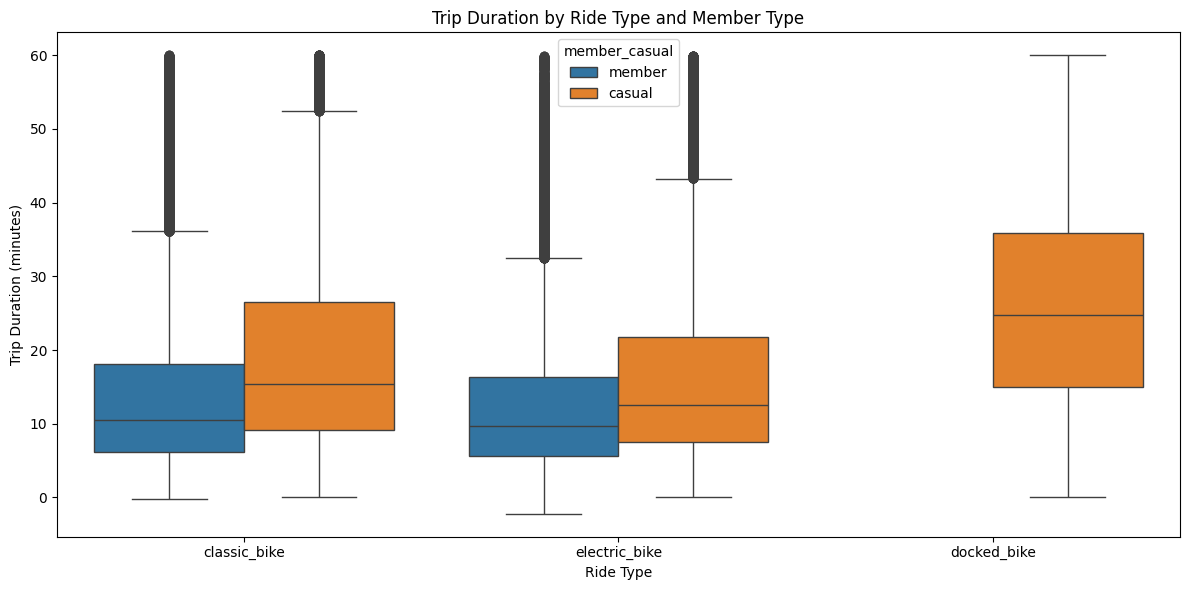

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rideable_type', y='trip_duration_min', hue='member_casual',
           data=df[df['trip_duration_min'] < 60])
plt.title('Trip Duration by Ride Type and Member Type')
plt.xlabel('Ride Type')
plt.ylabel('Trip Duration (minutes)')
plt.tight_layout()
plt.savefig('duration_by_ride_type.png')
plt.show()

/var/folders/gv/h6_yc2393_gb_hjtgv8__2jm0000gn/T/ipykernel_19923/3479278837.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_coords['distance_km'] = df_with_coords.apply(


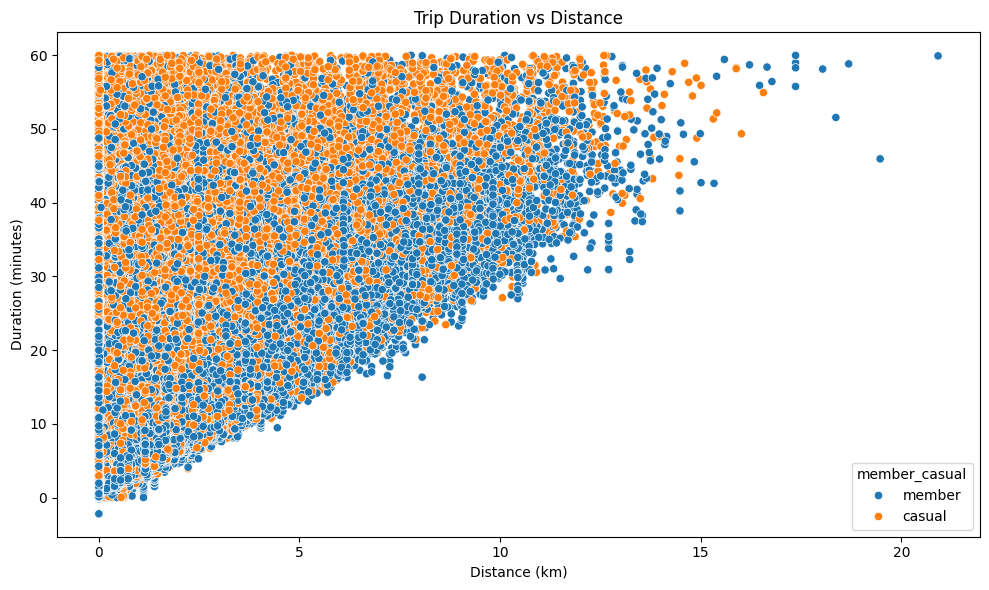

In [ ]:
def haversine_distance(lat1, lng1, lat2, lng2):
    # Convert decimal degrees to radians
    lat1, lng1, lat2, lng2 = map(np.radians, [lat1, lng1, lat2, lng2])
    # Haversine formula
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Radius of earth in kilometers
    r = 6371
    return c * r

# Calculate distance for each trip (remove rows with missing coordinates)
df_with_coords = df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])
df_with_coords['distance_km'] = df_with_coords.apply(
    lambda row: haversine_distance(row['start_lat'], row['start_lng'],
                                  row['end_lat'], row['end_lng']), axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='trip_duration_min',
               hue='member_casual', data=df_with_coords[df_with_coords['trip_duration_min'] < 60])
plt.title('Trip Duration vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.savefig('duration_vs_distance.png')
plt.show()


/var/folders/gv/h6_yc2393_gb_hjtgv8__2jm0000gn/T/ipykernel_19923/2352735023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_coords['avg_speed_kph'] = df_with_coords['distance_km'] / (df_with_coords['trip_duration_min']/60)


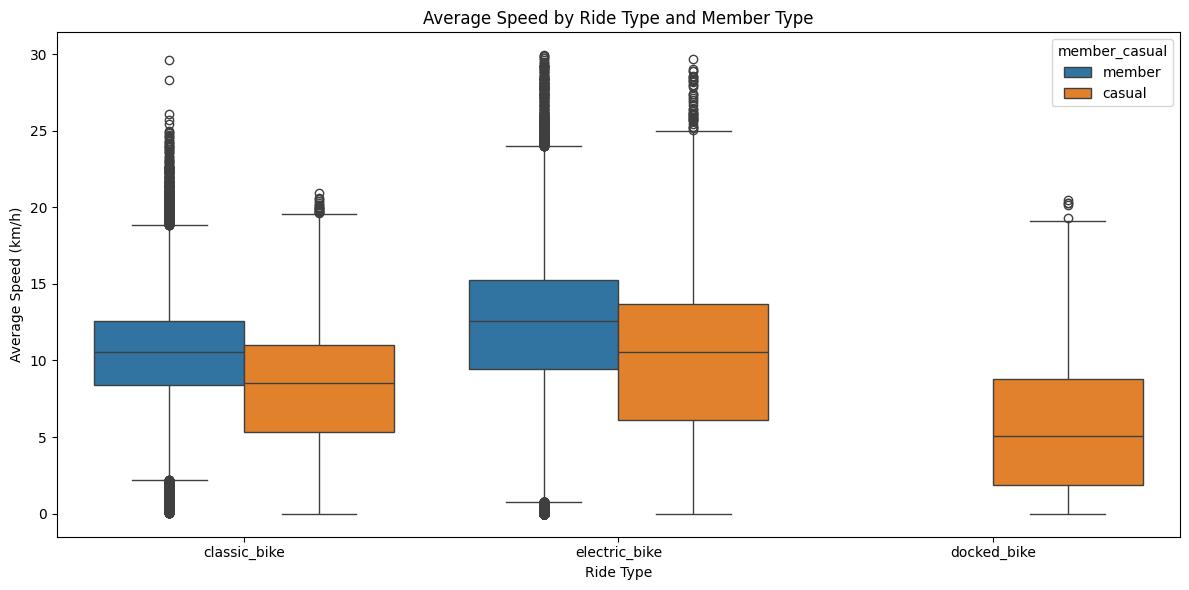

In [ ]:
df_with_coords['avg_speed_kph'] = df_with_coords['distance_km'] / (df_with_coords['trip_duration_min']/60)
# Filter out unrealistic speeds
df_speed = df_with_coords[(df_with_coords['avg_speed_kph'] > 0) & (df_with_coords['avg_speed_kph'] < 30)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='rideable_type', y='avg_speed_kph', hue='member_casual', data=df_speed)
plt.title('Average Speed by Ride Type and Member Type')
plt.xlabel('Ride Type')
plt.ylabel('Average Speed (km/h)')
plt.tight_layout()
plt.savefig('avg_speed.png')
plt.show()